<a href="https://colab.research.google.com/github/aguywithbrain/tic-tac-toe/blob/main/juned_(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data_Train_path = 'Documents/cnn model/Train'
data_Test_path = 'Documents/cnn model/Test'
data_Validation_path = 'Documents/cnn model/Validation'

In [3]:
img_width = 200
img_height = 200

In [4]:
data_Train = tf.keras.utils.image_dataset_from_directory(
    data_Train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

NotFoundError: Could not find directory Documents/cnn model/Train

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data_Val = tf.keras.utils.image_dataset_from_directory(data_Validation_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                       shuffle=False,
                                                       validation_split=False)

Found 600 files belonging to 3 classes.


In [ ]:
data_Test = tf.keras.utils.image_dataset_from_directory(data_Test_path,
                                                        image_size=(img_height,img_width),
                                                        batch_size=32,
                                                        shuffle=False,
                                                        validation_split=False)

Found 253 files belonging to 3 classes.


In [ ]:
data_neural = data_Train.class_names

In [ ]:
data_neural

['BlackSigakota', 'FusariumWilt', 'Healthy']

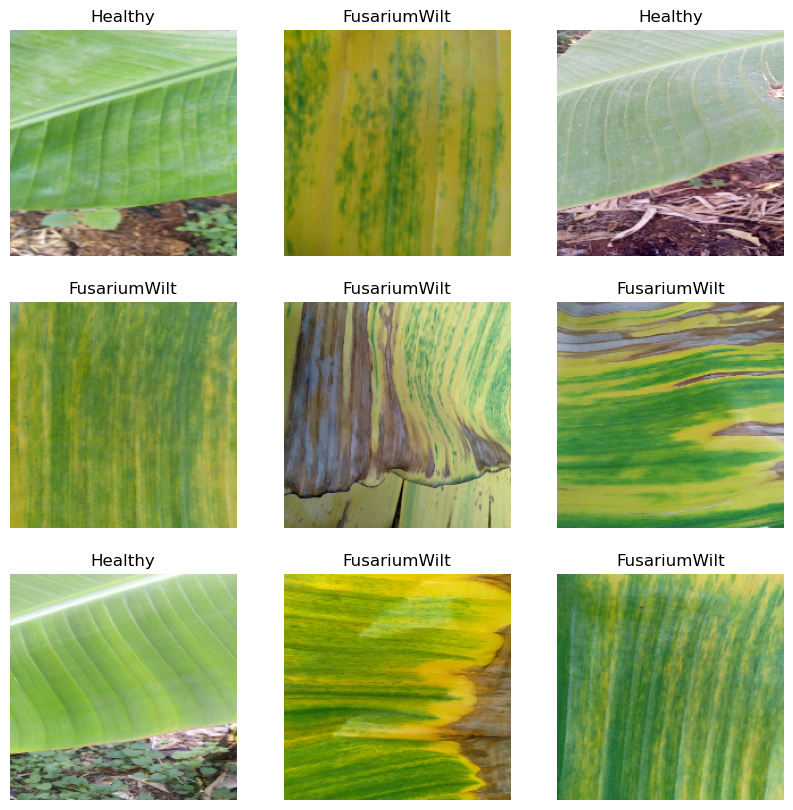

In [ ]:
plt.figure(figsize=(10,10))
for image, labels in data_Train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_neural[labels[i]])
        plt.axis('off')

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
data_Train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_neural))

])

In [ ]:
        model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
epochs_size = 25
history = model.fit(data_Train, validation_data=data_Val, epochs=epochs_size)

Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 540ms/step - accuracy: 0.3735 - loss: 2.4719 - val_accuracy: 0.3283 - val_loss: 1.2248
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 426ms/step - accuracy: 0.5905 - loss: 0.9305 - val_accuracy: 0.1700 - val_loss: 1.6787
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 377ms/step - accuracy: 0.7095 - loss: 0.6282 - val_accuracy: 0.3283 - val_loss: 2.3729
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 349ms/step - accuracy: 0.8298 - loss: 0.3811 - val_accuracy: 0.3150 - val_loss: 3.0132
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 317ms/step - accuracy: 0.8930 - loss: 0.2597 - val_accuracy: 0.4017 - val_loss: 2.2736
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 317ms/step - accuracy: 0.9297 - loss: 0.2244 - val_accuracy: 0.3900 - val_loss: 3.2218
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 313ms/step - accuracy: 0.9297 - loss: 0.1873 - val_accuracy: 0.3450 - val_loss: 3.4553
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 321ms/step - accuracy: 0.9233 - loss: 0.1846 - val_accuracy: 0.

Text(0.5, 1.0, 'Loss')

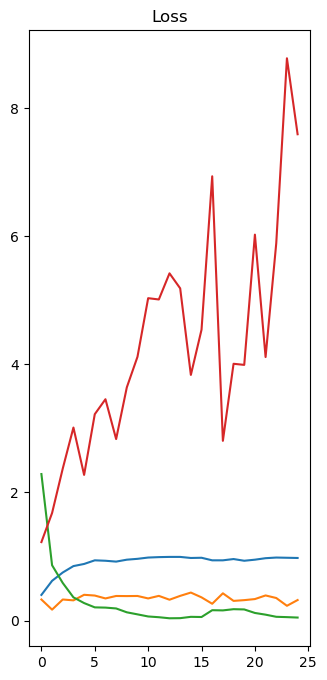

In [ ]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')


plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')


In [ ]:
image = 'Documents/cnn model/Image_2807.jpg'
image = tf.keras.utils.load_img(image, target_size = (img_height, img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [ ]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step


In [ ]:
score = tf.nn.softmax(predict)

In [ ]:
print('image/plant in image is{} with accuracy of {:0.2f}'.format(data_neural[np.argmax(score)],np.max(score)*100))

image/plant in image isHealthy with accuracy of 35.46


In [ ]:
model.save('Image_classify.keras')